In [1]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clones.data.experiments import Experiment
from clones.visualization.settings import *

In [3]:
figsize = (2, 2)
savedir = '../../../figures/graphics/example_failure/'
savefig = lambda fig, name: fig.savefig(join(savedir, '{:s}.pdf'.format(name)), dpi=400, 
                                        rasterized=True, transparent=True, bbox_inches='tight')

# Load microscopy data

Confocal images are of a bleedthrough control experiment consisting of three color channels:
   - BLUE: Nuclear stain
   - RED: Clonal marker
   - GREEN: Control reporter (expressed equally within a vertical stripe of cells near the furrow)
   
We will use the first layer of the 4th stack as an example.

In [4]:
stack_id = 2
layer_id = 0

In [5]:
# load experiment
experiment = Experiment('../../../data/drosophila/')

# load image stack
stack = experiment.load_stack(experiment.stack_ids[stack_id], full=True)
layer = stack[layer_id]

# concatenate manual labels
manual_labels = stack.load_silhouette_labels()

layer.data['layer'] = layer_id

# Train annotator

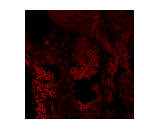

In [6]:
fig = layer.get_channel('r').show(segments=False, cmap='r', figsize=figsize)

savefig(fig, 'clonal_marker')

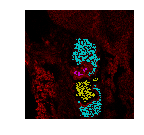

In [10]:
layer.data['id'] = layer.data.segment_id
kmask = layer.build_attribute_mask('genotype_imap', selection_only=True, interior_only=True)
fig = layer.get_channel('r').show(segments=False, cmap='r', figsize=figsize)
cmap = ListedColormap(['y', 'c', 'm'], N=3)
cmap.set_bad(alpha=0.)
fig.axes[0].imshow(kmask, cmap=cmap, vmin=0, vmax=2, alpha=1.)

#savefig(fig, 'automated_labels')

In [8]:
labels = manual_labels.loc[0].reset_index()
layer.data = layer.data.merge(labels, on='segment_id', how='outer')
layer.data.manual_label.replace(np.nan, -1, inplace=True)

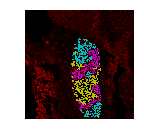

In [9]:
layer.data['id'] = layer.data.segment_id
manual_mask = layer.build_attribute_mask('manual_label', selection_only=True)
fig = layer.get_channel('r').show(segments=False, cmap='r', figsize=figsize)
cmap = ListedColormap(['y', 'c', 'm'], N=3)
cmap.set_bad(alpha=0.)
fig.axes[0].imshow(manual_mask, cmap=cmap, vmin=0, vmax=2, alpha=1.)

savefig(fig, 'manual_labels')